## Pré-processamento dos dados

In [2079]:
# imports
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import pickle

In [2080]:
# carregar base de dados
dados_filmes = pd.read_csv("/content/base_dados/desafio_indicium_imdb.csv")
dados_filmes.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [2081]:
# exibir os nomes das colunas
dados_filmes.columns

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [2082]:
# alterar o cabeçalho da coluna 'Unnamed: 0' e 'Series_Title'
dados_filmes.rename(columns = {"Unnamed: 0": "Movie_ID", "Series_Title": "Movie_Title"}, inplace = True)
dados_filmes.head()

,Movie_ID,Movie_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


#### Dicionário de dados:
- 'Movie_ID': Número de identificação do filme.
- 'Movie_Title': Título do filme.
- 'Released_Year': Ano em que o filme foi lançado.
- 'Certificate': Classificação etária do filme
- 'Runtime': Tempo de duração do filme
- 'Genre': Gênero do filme
- 'IMDB_Rating': Nota / avaliação do filme na base de dados de filmes da internet (IMDB)
- 'Overview': Visão geral do filme
- 'Meta_score': Média ponderada das notas dos críticos do filme
- 'Director': Diretor
- 'Star1': Ator/Atriz 1
- 'Star2': Ator/Atriz 2
- 'Star3': Ator/Atriz 3
- 'Star4': Ator/Atriz 4
- 'No_of_Votes': Número de votos
- 'Gross': Faturamento do filme

In [2083]:
# dimensão dos dados
dados_filmes.shape

(999, 16)

In [2084]:
# tipos dos dados da base
dados_filmes.dtypes

Movie_ID           int64
Movie_Title       object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [2085]:
# verificar se há valores faltando
dados_filmes.isnull().sum()

Movie_ID           0
Movie_Title        0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [2086]:
# verificar se há instâncias duplicadas
dados_filmes[dados_filmes.duplicated()]

,Movie_ID,Movie_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


- Não há instâncias duplicadas.

#### Checar os dados da coluna "Movie_Title"

In [2087]:
# verificando se há algum dado incomum
dados_filmes.Movie_Title.unique()[0:5]

array(['The Godfather', 'The Dark Knight', 'The Godfather: Part II',
       '12 Angry Men', 'The Lord of the Rings: The Return of the King'],
      dtype=object)

- Não foram encontrados dados incomuns na coluna 'Movie_Title'.

#### Checar os dados da coluna "Released_Year"

In [2088]:
# exibir os valores únicos
dados_filmes.Released_Year.unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

- Há um valor 'PG' que não corresponde a uma data na coluna "Released_Year".

In [2089]:
# verificar qual é a instância que contém o valor 'PG'
dados_filmes[dados_filmes["Released_Year"] == 'PG']

,Movie_ID,Movie_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


- O filme 'Apollo 13' foi lançado em 1995, de acordo com o google, logo, 'PG' será substituído por '1995'.

In [2090]:
# substituir 'PG' por '1995' na coluna 'Released_Year'
dados_filmes.Released_Year = dados_filmes.Released_Year.replace('PG', '1995')

In [2091]:
# checar se a substituição foi realizada com sucesso
dados_filmes[dados_filmes["Movie_Title"] == 'Apollo 13']

,Movie_ID,Movie_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,966,Apollo 13,1995,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [2092]:
# verificando os dados únicos novamente
dados_filmes.Released_Year.unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943'], dtype=object)

- Não há mais nenhum valor incomum.

In [2093]:
# converter os anos de lançamento de 'object' para 'int'
dados_filmes["Released_Year"] = dados_filmes["Released_Year"].astype('int64')

In [2094]:
# checando os tipos dos dados novamente
dados_filmes.dtypes

Movie_ID           int64
Movie_Title       object
Released_Year      int64
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

#### Checar os dados da coluna "Certificate"

In [2095]:
# checar os valores únicos
dados_filmes.Certificate.unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

- Há várias nomenclaturas utilizadas para definir a classificação etária do filme.
- Há também 'nan' que indica que há filmes cuja classificação etária não foi atribuída.
- Uma solução para esse problema é classificar esses filmes como 'Unrated'.


In [2096]:
# quantidade de filmes cuja classificação etária é 'nan'
dados_filmes["Certificate"].isnull().sum()

101

In [2097]:
# substituir 'NaN' por 'Unrated'
dados_filmes["Certificate"].fillna("Unrated", inplace = True)

In [2098]:
# verificando novamente a quantidade de filmes cuja classificação etária é 'nan'
dados_filmes["Certificate"].isnull().sum()

0

In [2099]:
dados_filmes.isnull().sum()

Movie_ID           0
Movie_Title        0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

- Os valores 'NaN' foram substituídos por 'Unrated', logo, não há mais dados faltando nessa coluna.

### Checar os dados da coluna "Runtime"

In [2100]:
# exibir os valores únicos contidos na coluna "Runtime"
dados_filmes["Runtime"].unique()[0:5]

array(['175 min', '152 min', '202 min', '96 min', '201 min'], dtype=object)

- Todos os tempos de duração dos filmes estão em minutos.
- Vamos retirar a 'string' 'min' e, depois converter para o tipo inteiro.
- Podemos alterar o cabeçalho 'Runtime' para 'Runtime_min' para deixar claro que a duração é em minutos.


In [2101]:
# remover a substring 'min' da coluna 'Runtime'
dados_filmes['Runtime'] = dados_filmes['Runtime'].str.replace('min', '')

# converter de string para inteiro
dados_filmes['Runtime'] = dados_filmes['Runtime'].astype(int)

In [2102]:
# checar o tipo de dados
dados_filmes.Runtime.dtypes

dtype('int64')

In [2103]:
# alterar os cabeçalhos
dados_filmes.rename(columns = {"Runtime": "Runtime_Min", "Meta_score": "Meta_Score"}, inplace = True)

In [2104]:
dados_filmes.head()

,Movie_ID,Movie_Title,Released_Year,Certificate,Runtime_Min,Genre,IMDB_Rating,Overview,Meta_Score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


- Como podemos observar na tabela acima, a substring 'min' foi removida e o tipo de dados agora é inteiro.

#### Checar os dados da coluna "Genre"

In [2105]:
# exibir os valores únicos contidos na coluna "Genre"
dados_filmes["Genre"].unique()[0:10]

array(['Crime, Drama', 'Action, Crime, Drama', 'Action, Adventure, Drama',
       'Biography, Drama, History', 'Action, Adventure, Sci-Fi', 'Drama',
       'Drama, Romance', 'Western', 'Action, Sci-Fi',
       'Biography, Crime, Drama'], dtype=object)

- Não foram encontrados dados incomuns na coluna 'Genre'.
- A descrição dos gêneros é feita utilizando dois ou mais gêneros ao mesmo tempo.

In [2106]:
# quantidade valores únicos na coluna "Genre"
dados_filmes["Genre"].nunique()

202

In [2107]:
# contar a quantidade de filmes por gênero
dados_filmes.groupby("Genre")["Movie_Title"].count()

Genre
Action, Adventure                5
Action, Adventure, Biography     1
Action, Adventure, Comedy       10
Action, Adventure, Crime         1
Action, Adventure, Drama        14
                                ..
Mystery, Romance, Thriller       1
Mystery, Sci-Fi, Thriller        2
Mystery, Thriller                9
Thriller                         1
Western                          4
Name: Movie_Title, Length: 202, dtype: int64

- Ao todo há 202 categorias de filmes.

In [2108]:
# somar todas as quantidades de filmes
dados_filmes.groupby("Genre")["Movie_Title"].count().sum()

999

#### Checar os dados da coluna "IMDB_Rating"

In [2109]:
dados_filmes["IMDB_Rating"].unique()

array([9.2, 9. , 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. , 7.9,
       7.8, 7.7, 7.6])

- Não há dados incomuns nessa coluna.

#### Analisar a coluna "Overview"

In [2110]:
dados_filmes["Overview"].unique()[0:5]

array(["An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.",
       'When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.',
       'The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.',
       'A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.',
       "Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring."],
      dtype=object)

- Cada elemento dessa coluna contém uma visão geral sobre o filme.

#### Checar os dados da coluna "Meta_score"

In [2111]:
# exibir os valores únicos
dados_filmes["Meta_Score"].unique()

array([100.,  84.,  90.,  96.,  94.,  74.,  66.,  92.,  82.,  87.,  73.,
        83.,  nan,  79.,  91.,  61.,  59.,  65.,  85.,  98.,  89.,  88.,
        57.,  67.,  62.,  77.,  64.,  75.,  80.,  97.,  99.,  78.,  68.,
        81.,  95.,  76.,  69.,  55.,  70.,  58.,  86.,  71.,  63.,  93.,
        72.,  60.,  47.,  49.,  50.,  33.,  54.,  56.,  51.,  53.,  48.,
        44.,  45.,  40.,  52.,  28.,  36.,  46.,  30.,  41.])

- As pontuações estão dentro do intervalo [0.0 a 100].
- O 'nan' indica que há valores faltando.

In [2112]:
# quantidade de valores faltando na coluna 'Meta_score'
dados_filmes["Meta_Score"].isnull().sum()

157

- Uma forma de solucionar o problema de valores faltando é substituindo os 'NaNs' pelo valor da média das notas contidas na coluna 'Meta_score'.

In [2113]:
# calcular a média das pontuações
media_pontuacoes = dados_filmes["Meta_Score"].mean(skipna = True)

print(f"Média: {media_pontuacoes}")

Média: 77.96912114014252


In [2114]:
# substituir os 'NaN's pela média
dados_filmes["Meta_Score"].fillna(media_pontuacoes, inplace = True)

In [2115]:
# verificando novamente a quantidade de valores faltando na coluna 'Meta_score'
dados_filmes["Meta_Score"].isnull().sum()

0

- Os 'NaN's foram substituídos pela média, logo, não há mais valores faltando.
- Na instância abaixo, podemos verificar na coluna 'Meta_score', que a substituição foi realizada com sucesso.

In [2116]:
# exibindo um instância com 'Meta_score' igual à média
dados_filmes[19:20]

,Movie_ID,Movie_Title,Released_Year,Certificate,Runtime_Min,Genre,IMDB_Rating,Overview,Meta_Score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
19,20,Soorarai Pottru,2020,U,153,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",77.969121,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN


#### Checar os dados da coluna "Director"

In [2117]:
# exibir valores únicos
dados_filmes["Director"].unique()[0:5]

array(['Francis Ford Coppola', 'Christopher Nolan', 'Sidney Lumet',
       'Peter Jackson', 'Quentin Tarantino'], dtype=object)

- Não foi encontrado nenhum valor incomum nessa coluna.

#### Checar os dados da coluna "Star1"

In [2118]:
# exibir valores únicos
dados_filmes["Star1"].unique()[0:5]

array(['Marlon Brando', 'Christian Bale', 'Al Pacino', 'Henry Fonda',
       'Elijah Wood'], dtype=object)

- Não foi encontrado nenhum dado incomum nessa coluna.

#### Checar os dados da coluna "Star2"

In [2119]:
# exibir valores únicos
dados_filmes["Star2"].unique()[0:5]

array(['Al Pacino', 'Heath Ledger', 'Robert De Niro', 'Lee J. Cobb',
       'Viggo Mortensen'], dtype=object)

- Não foi encontrado nenhum dado incomum nessa coluna.

#### Checar os dados da coluna "Star3"

In [2120]:
# exibir valores únicos
dados_filmes["Star3"].unique()[0:5]

array(['James Caan', 'Aaron Eckhart', 'Robert Duvall', 'Martin Balsam',
       'Ian McKellen'], dtype=object)

- Não foi encontrado nenhum dado incomum nessa coluna.

#### Checar os dados da coluna "Star4"

In [2121]:
# exibir valores únicos
dados_filmes["Star4"].unique()[0:5]

array(['Diane Keaton', 'Michael Caine', 'John Fiedler', 'Orlando Bloom',
       'Bruce Willis'], dtype=object)

- Não foi encontrado nenhum dado incomum nessa coluna.

#### Checar os dados da coluna "No_of_Votes"

In [2122]:
# exibir valores únicos
dados_filmes["No_of_Votes"].unique()[0:5]

array([1620367, 2303232, 1129952,  689845, 1642758])

- Não foi encontrado nenhum valor incomum nessa coluna.

#### Checar os dados da coluna "Gross"

In [2123]:
# exibir valores únicos
dados_filmes["Gross"].unique()[0:25]

array(['134,966,411', '534,858,444', '57,300,000', '4,360,000',
       '377,845,905', '107,928,762', '96,898,818', '292,576,195',
       '37,030,102', '315,544,750', '330,252,182', '6,100,000',
       '342,551,365', '171,479,930', '46,836,394', '290,475,067',
       '112,000,000', nan, '53,367,844', '188,020,017', '7,563,397',
       '10,055,859', '216,540,909', '136,801,374', '57,598,247'],
      dtype=object)

- As casas decimais são separadas por vírgulas e, por isso, cada elemento é uma 'string'.
- Além disso, o 'nan' indica que há valores faltando.
- Para resolver o primeiro problema, as vírgulas serão retiradas e, depois, a 'string' será convertida para 'float'.
- Para resolver o segundo problema, os 'NaN's serão substituídos pela média dos faturamentos.

In [2124]:
# substituir as vírgulas por pontos
dados_filmes['Gross'] = dados_filmes['Gross'].str.replace(',', '')

# converter de 'string' para 'float'
dados_filmes['Gross'] = dados_filmes['Gross'].astype(float)

dados_filmes.head()

,Movie_ID,Movie_Title,Released_Year,Certificate,Runtime_Min,Genre,IMDB_Rating,Overview,Meta_Score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,5,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [2125]:
# verificar o tipo dos dados em 'Gross'
dados_filmes["Gross"].dtypes

dtype('float64')

In [2126]:
# quantidade de valores faltando
dados_filmes["Gross"].isnull().sum()

169

In [2127]:
# calcular a média dos faturamentos
media_faturamento = dados_filmes["Gross"].mean(skipna = True)

print(f"Média: {media_faturamento}")

Média: 68082574.10481928


In [2128]:
# substituir os 'NaN's pela média
dados_filmes["Gross"].fillna(media_faturamento, inplace = True)
dados_filmes.tail()

,Movie_ID,Movie_Title,Released_Year,Certificate,Runtime_Min,Genre,IMDB_Rating,Overview,Meta_Score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
994,995,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,6.808257e+07
995,996,Giant,1956,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,6.808257e+07
996,997,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,3.050000e+07
997,998,Lifeboat,1944,Unrated,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,6.808257e+07
998,999,The 39 Steps,1935,Unrated,86,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,6.808257e+07


In [2129]:
# quantidade de valores faltando
dados_filmes["Gross"].isnull().sum()

0

- Não há mais dados faltando e podemos ver na coluna 'Gross' que as médias foram substituídas com sucesso.

In [2130]:
# checar se ainda há valores faltando em toda a base de dados
dados_filmes.isnull().sum()

Movie_ID         0
Movie_Title      0
Released_Year    0
Certificate      0
Runtime_Min      0
Genre            0
IMDB_Rating      0
Overview         0
Meta_Score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

- Como não há mais dados faltando e todos os dados foram checados, podemos seguir para a análise exploratória dos dados.

## Análise Exploratória dos Dados (EDA)

In [2131]:
# primeiras 5 instâncias da base de dados
dados_filmes.head()

,Movie_ID,Movie_Title,Released_Year,Certificate,Runtime_Min,Genre,IMDB_Rating,Overview,Meta_Score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,5,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [2132]:
dados_filmes.columns

Index(['Movie_ID', 'Movie_Title', 'Released_Year', 'Certificate',
       'Runtime_Min', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_Score',
       'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [2133]:
dados_filmes.dtypes

Movie_ID           int64
Movie_Title       object
Released_Year      int64
Certificate       object
Runtime_Min        int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_Score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

### Análise individual das características

In [2134]:
# contar a quantidade de filmes por ano
dados_filmes.groupby(["Released_Year"]).size().nlargest()

Released_Year
2014    32
2004    31
2009    29
2013    28
2016    28
dtype: int64

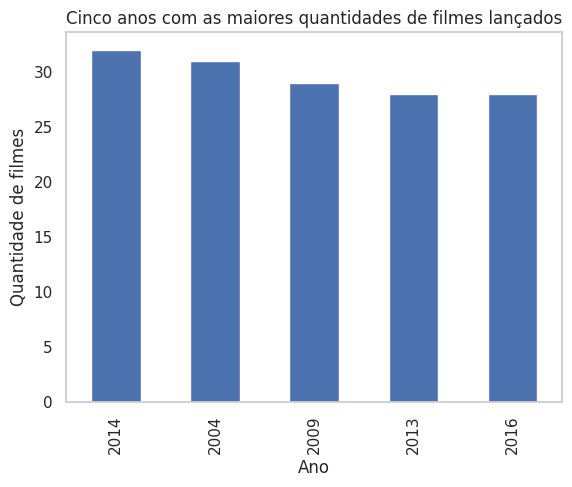

In [2135]:
# anos com a maior quantidade de filmes lançados
groups = dados_filmes.groupby(["Released_Year"]).size().nlargest()
groups.plot.bar()
plt.grid()
plt.xlabel('Ano')
plt.xticks(rotation=90)
plt.ylabel('Quantidade de filmes')
plt.title('Cinco anos com as maiores quantidades de filmes lançados');

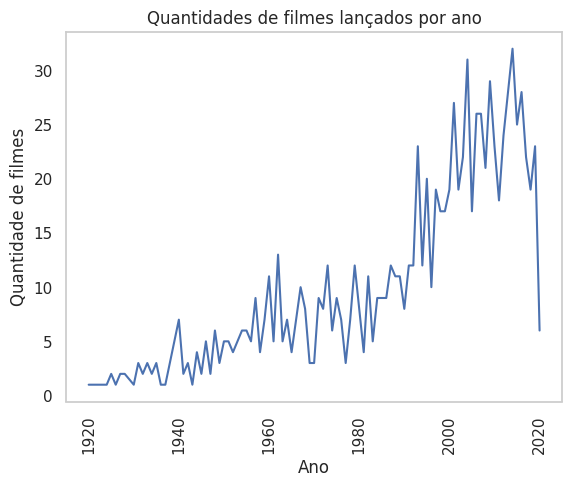

In [2136]:
# quantidade de filmes lançados por ano
dados_filmes.groupby(['Released_Year']).size().plot()
plt.grid()
plt.xlabel('Ano')
plt.xticks(rotation=90)
plt.ylabel('Quantidade de filmes')
plt.title('Quantidades de filmes lançados por ano');

- Os filmes foram lançados no intervalo de 1920 a 2020.
- À medida que os anos avançaram, houve um aumento no número de filmes lançados.
- Os três anos com o maior número de lançamentos de filmes foram 2014, 2004 e 2013/2016.

In [2137]:
# quantidade de filmes por classificação etária
dados_filmes.groupby(["Certificate"]).size().sort_values(ascending = False)

Certificate
U           234
A           196
UA          175
R           146
Unrated     102
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
16            1
TV-14         1
TV-MA         1
U/A           1
dtype: int64

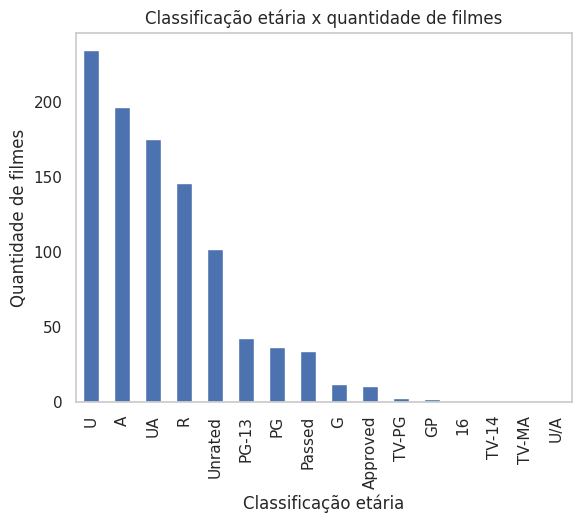

In [2138]:
# gráfico Classificação etária versus quantidade de filmes
groups = dados_filmes.groupby(["Certificate"]).size().sort_values(ascending = False)
groups.plot.bar()
plt.grid()
plt.xlabel('Classificação etária')
plt.xticks(rotation=90)
plt.ylabel('Quantidade de filmes')
plt.title('Classificação etária x quantidade de filmes');

- A maioria dos filmes lançados, cuja classificação etária foi atribuída, tem classificação U - Universal (234 filmes), seguidos por A - somente para adultos (196 filmes) e por UA - para maiores de 12 anos (175 filmes).

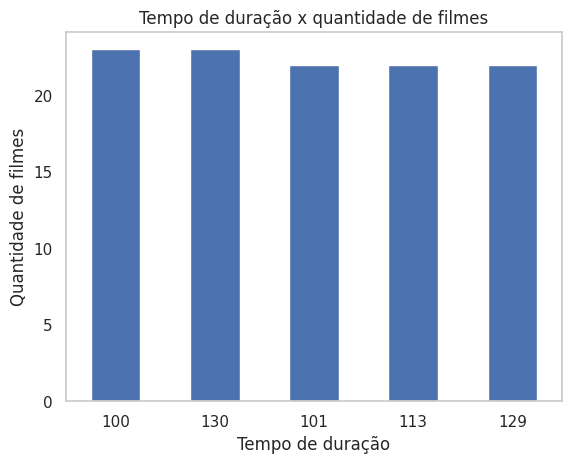

In [2139]:
# gráfico Tempo de duração x quantidade de filmes
groups = dados_filmes.groupby(["Runtime_Min"]).size().nlargest()
groups.plot.bar()
plt.grid()
plt.xlabel('Tempo de duração')
plt.xticks(rotation=0)
plt.ylabel('Quantidade de filmes')
plt.title('Tempo de duração x quantidade de filmes');

In [2140]:
# quantidade de filmes por classificação etária
dados_filmes.groupby(["Runtime_Min"]).size().nlargest()

Runtime_Min
100    23
130    23
101    22
113    22
129    22
dtype: int64

In [2141]:
# dados estatísticos
dados_filmes["Runtime_Min"].describe()

count    999.000000
mean     122.871872
std       28.101227
min       45.000000
25%      103.000000
50%      119.000000
75%      137.000000
max      321.000000
Name: Runtime_Min, dtype: float64

- A maioria dos filmes (23) tem duração de 100 ou 130 minutos.
- A menor duração de um filme é de 45 minutos e a maior é de 321 minutos.
- A duração média dos filmes é de aproximadamente 123 minutos.

In [2142]:
# quantidade de filmes por classificação de gênero (10 maiores)
dados_filmes.groupby(["Genre"]).size().nlargest(10)

Genre
Drama                           84
Drama, Romance                  37
Comedy, Drama                   35
Comedy, Drama, Romance          31
Action, Crime, Drama            30
Biography, Drama, History       28
Crime, Drama, Thriller          28
Crime, Drama, Mystery           27
Crime, Drama                    26
Animation, Adventure, Comedy    24
dtype: int64

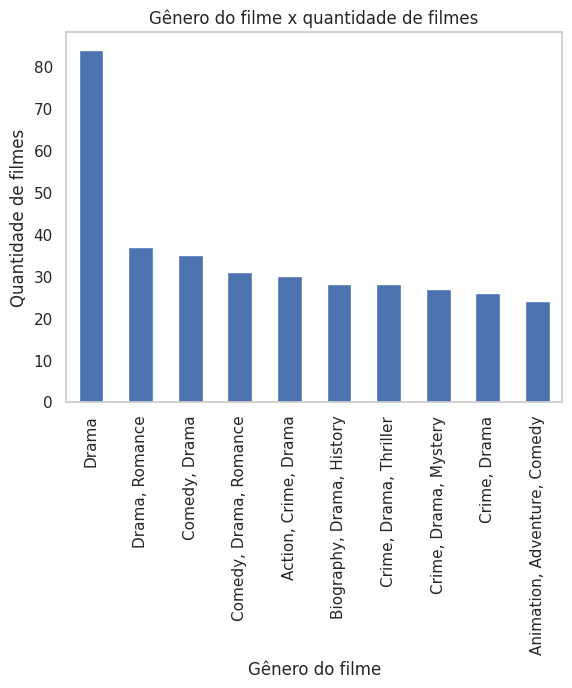

In [2143]:
# gráfico Tempo de duração x quantidade de filmes
groups = dados_filmes.groupby(["Genre"]).size().nlargest(10)
groups.plot.bar()
plt.grid()
plt.xlabel('Gênero do filme')
plt.xticks(rotation=90)
plt.ylabel('Quantidade de filmes')
plt.title('Gênero do filme x quantidade de filmes');

- A maior quantidade de filmes lançados pertencem ao gênero drama (84 filmes).
- A segunda e terceira maior quantidade de filmes (37 e 35 filmes) contém drama como parte do gênero do filme diferenciando pelo segundo gênero, romance e comédia.

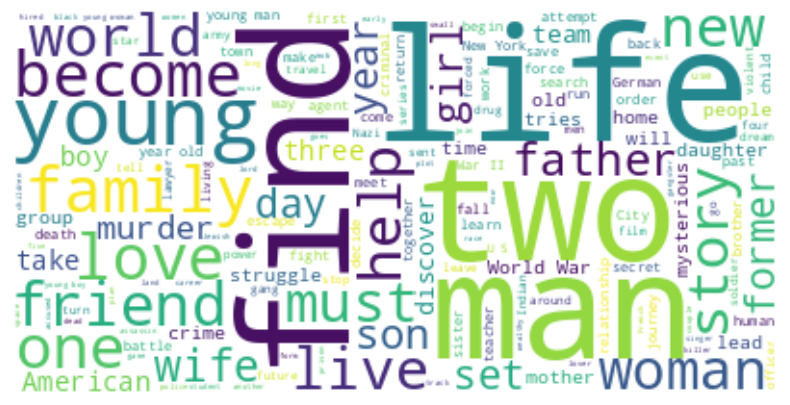

In [2144]:
# palavras mais comuns em 'Overview'
text = " ".join(overview for overview in dados_filmes.Overview)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [2145]:
# quantidade de filmes por diretor (10 maiores)
dados_filmes.groupby(["Director"]).size().nlargest(10)

Director
Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Akira Kurosawa       10
Martin Scorsese      10
Billy Wilder          9
Stanley Kubrick       9
Woody Allen           9
Christopher Nolan     8
Clint Eastwood        8
dtype: int64

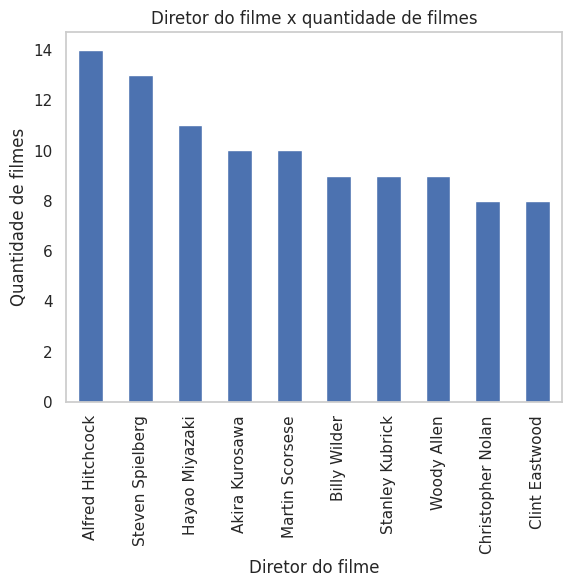

In [2146]:
# gráfico Diretor x quantidade de filmes
groups = dados_filmes.groupby(["Director"]).size().nlargest(10)
groups.plot.bar()
plt.grid()
plt.xlabel('Diretor do filme')
plt.xticks(rotation=90)
plt.ylabel('Quantidade de filmes')
plt.title('Diretor do filme x quantidade de filmes');

- O diretor com a maior quantidade de filmes lançados foi o Alfred Hitchcock, com 14 filmes, seguido por Steven Spielberg, com 13 filmes.

In [2147]:
# quantidade de filmes por atriz/ator 1 (5 maiores)
dados_filmes.groupby(["Star1"]).size().nlargest()

Star1
Tom Hanks          12
Robert De Niro     11
Al Pacino          10
Clint Eastwood     10
Humphrey Bogart     9
dtype: int64

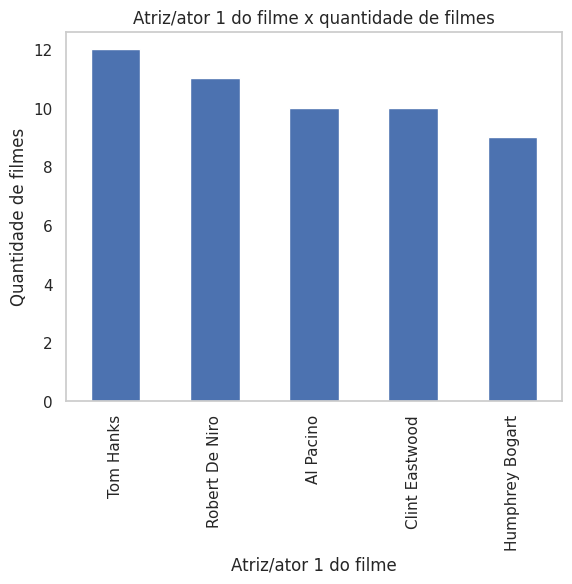

In [2148]:
# gráfico atriz/ator 1 x quantidade de filmes
groups = dados_filmes.groupby(["Star1"]).size().nlargest()
groups.plot.bar()
plt.grid()
plt.xlabel('Atriz/ator 1 do filme')
plt.xticks(rotation=90)
plt.ylabel('Quantidade de filmes')
plt.title('Atriz/ator 1 do filme x quantidade de filmes');

- O ator 1 que mais participou de filmes foi Tom Hanks, com 12 filmes.
- A primeira atriz 1 só foi aparecer na posição 40, o que indica que homens assumem mais papéis principais em filmes do que as mulheres.

In [2149]:
# quantidade de filmes por atriz/ator 2 (5 maiores)
dados_filmes.groupby(["Star2"]).size().nlargest()

Star2
Emma Watson     7
Matt Damon      5
Brad Pitt       4
Chris Evans     4
Diane Keaton    4
dtype: int64

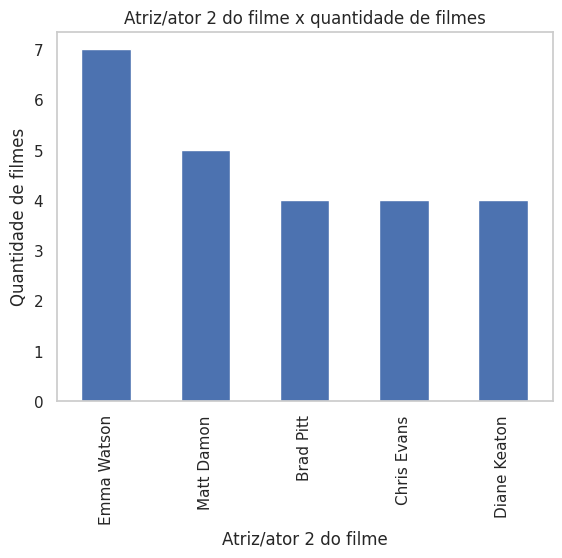

In [2150]:
# gráfico atriz/ator 2 x quantidade de filmes
groups = dados_filmes.groupby(["Star2"]).size().nlargest()
groups.plot.bar()
plt.grid()
plt.xlabel('Atriz/ator 2 do filme')
plt.xticks(rotation=90)
plt.ylabel('Quantidade de filmes')
plt.title('Atriz/ator 2 do filme x quantidade de filmes');

- O atriz 2 que mais participou de filmes foi Emma Watson, com 7 filmes.

In [2151]:
# quantidade de filmes por atriz/ator 3 (5 maiores)
dados_filmes.groupby(["Star3"]).size().nlargest()

Star3
Rupert Grint         5
Carrie Fisher        4
Jennifer Connelly    4
Joe Pesci            4
John Goodman         4
dtype: int64

In [2152]:
# quantidade de filmes por atriz/ator 5 (5 maiores)
dados_filmes.groupby(["Star4"]).size().nlargest()

Star4
Michael Caine       4
Catherine Keener    3
Mark Ruffalo        3
Alan Arkin          2
Albert Brooks       2
dtype: int64

In [2153]:
# dados estatísticos da coluna 'No_of_Votes' (número de votos)
dados_filmes["No_of_Votes"].describe().apply('{:,.2f}'.format)

count          999.00
mean       271,621.42
std        320,912.62
min         25,088.00
25%         55,471.50
50%        138,356.00
75%        373,167.50
max      2,303,232.00
Name: No_of_Votes, dtype: object

- A média do número de votos é de 271.624,42 votos.
- 25% dos filmes contém um número de votos menor ou igual a 55.471,50.
- 50% dos filmes contém um número de votos menor ou igual a 138.356,00.
- 75% dos filmes contém um número de votos menor ou igual a 373.167,50.

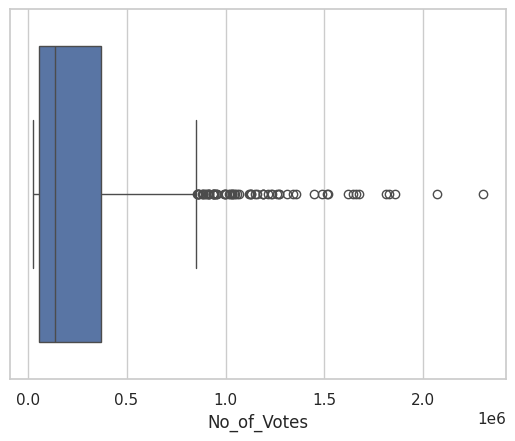

In [2154]:
# boxplot dos percentis da coluna com o número de votos
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=dados_filmes["No_of_Votes"])

In [2155]:
# dados estatísticos da coluna 'Gross' (faturamento)
dados_filmes["Gross"].describe().apply('{:,.2f}'.format)

count            999.00
mean      68,082,574.10
std      100,079,288.65
min            1,305.00
25%        5,011,838.50
50%       42,438,300.00
75%       68,082,574.10
max      936,662,225.00
Name: Gross, dtype: object

- A média do número faturamento é de 68.082.574,10
- 25% dos filmes contém um faturamento menor ou igual a 5.011.838,50
- 50% dos filmes contém um faturamento menor ou igual a 42.438.300,00
- 75% dos filmes contém um faturamento menor ou igual a 68.082.574,10

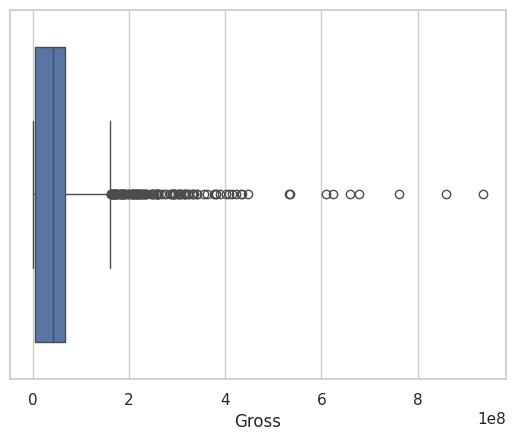

In [2156]:
# boxplot dos percentis do faturamento
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=dados_filmes["Gross"])

In [2157]:
# quantidade de filmes e suas avaliações IMDB
dados_filmes.groupby(["IMDB_Rating"]).size().sort_values(ascending = False)

IMDB_Rating
7.7    157
7.8    151
8.0    141
8.1    127
7.6    123
7.9    106
8.2     67
8.3     44
8.4     31
8.5     20
8.6     15
8.7      5
8.8      5
8.9      3
9.0      3
9.2      1
dtype: int64

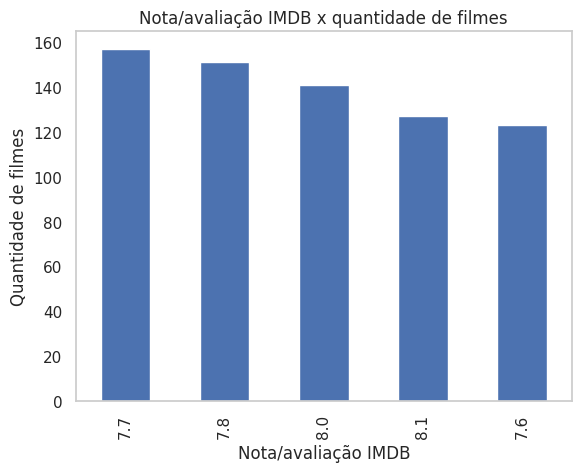

In [2158]:
# gráfico Nota/avaliação IMDB x quantidade de filmes
groups = dados_filmes.groupby(["IMDB_Rating"]).size().nlargest()
groups.plot.bar()
plt.grid()
plt.xlabel('Nota/avaliação IMDB')
plt.xticks(rotation=90)
plt.ylabel('Quantidade de filmes')
plt.title('Nota/avaliação IMDB x quantidade de filmes');

- A maioria dos filmes foi avaliado com nota IMDB 7,7

In [2159]:
# quantidade de filmes e suas pontuações Meta
dados_filmes.groupby(["Meta_Score"]).size().nlargest()

Meta_Score
77.969121    157
76.000000     32
84.000000     29
90.000000     29
72.000000     27
dtype: int64

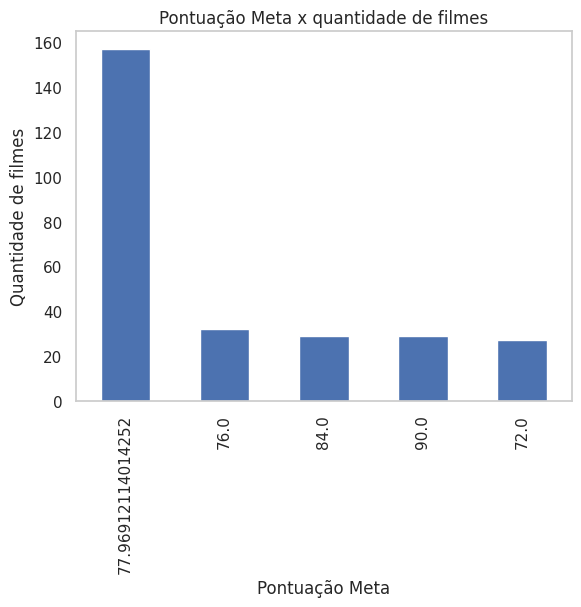

In [2160]:
# gráfico Nota/avaliação IMDB x quantidade de filmes
groups = dados_filmes.groupby(["Meta_Score"]).size().nlargest()
groups.plot.bar()
plt.grid()
plt.xlabel('Pontuação Meta')
plt.xticks(rotation=90)
plt.ylabel('Quantidade de filmes')
plt.title('Pontuação Meta x quantidade de filmes');

### Análise da relação entre características

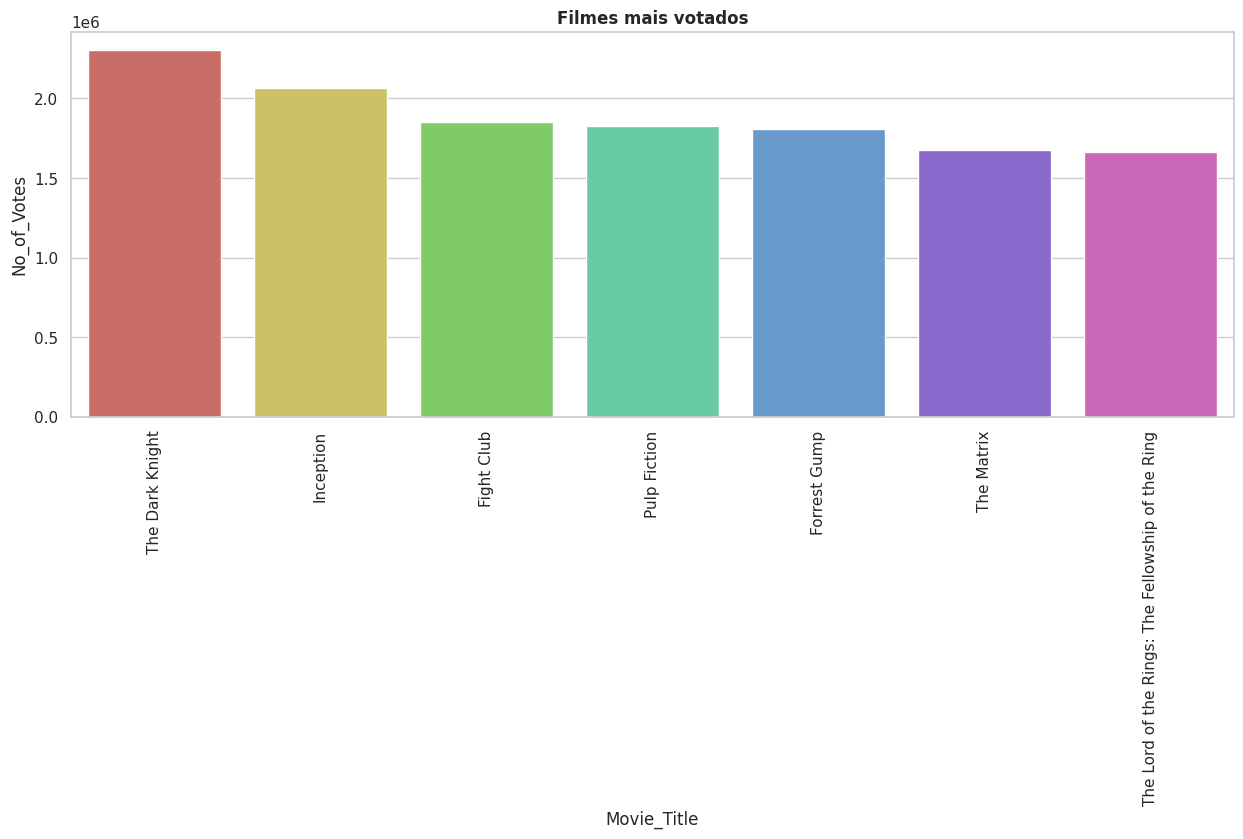

In [2161]:
# filmes mais votados

# ordenar os filmes de acordo com o número de votos
top_voted = dados_filmes.sort_values(['No_of_Votes'], ascending = False)

# obter os títulos dos sete primeiros filmes
movies_titles_top = top_voted['Movie_Title'][:7]

# plotar gráfico
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x = movies_titles_top, y = top_voted['No_of_Votes'][:7], hue = movies_titles_top, palette = 'hls')
g.set_title("Filmes mais votados", weight = "bold")
plt.xticks(rotation=90)
plt.show()

- Os três filmes mais votados foram 'The Dark Knight' (2.303.232 votos), 'Inception' (2.067.042 votos) e 'Fight Club' (1.854.740 votos).

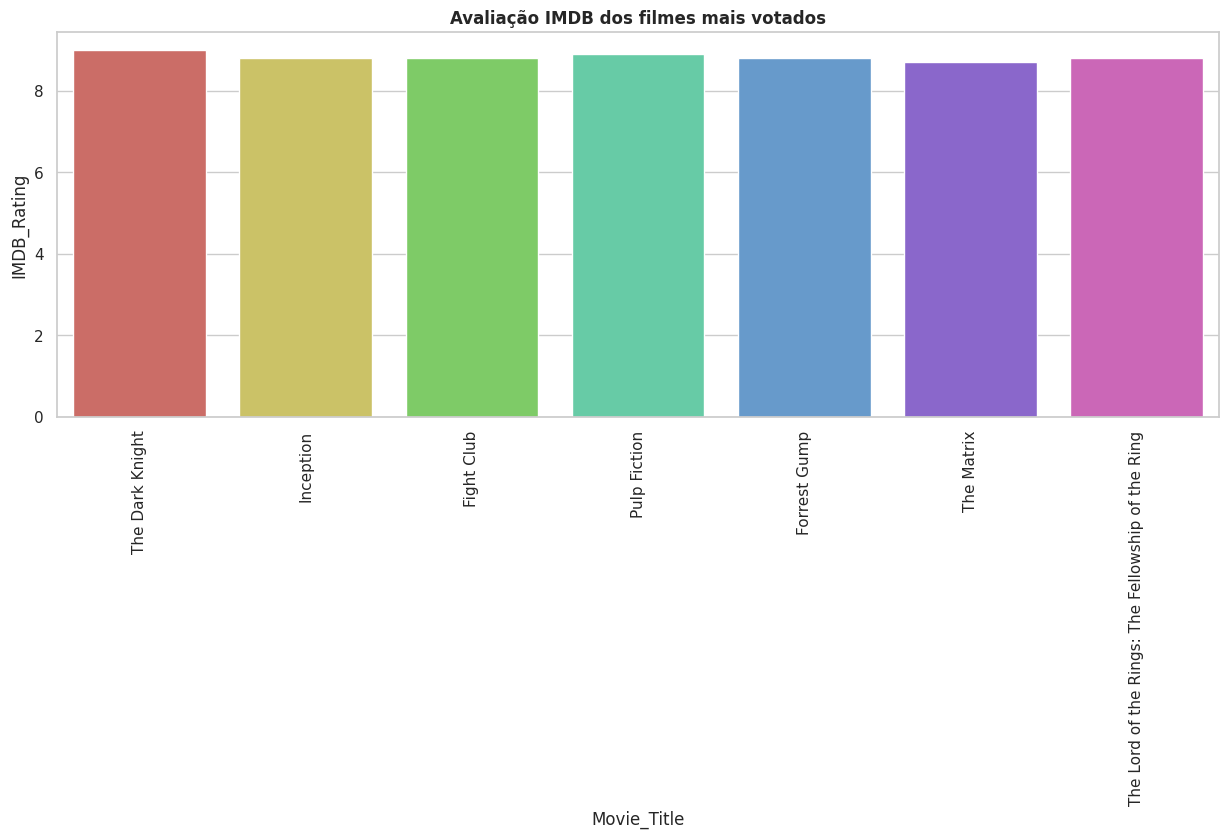

In [2162]:
# avaliação IMDB dos filmes mais votados

# obter os títulos dos sete primeiros filmes
movies_titles_top = top_voted['Movie_Title'][:7]

# plotar gráfico
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x = movies_titles_top, y = top_voted['IMDB_Rating'][:7], hue = movies_titles_top, palette = 'hls')
g.set_title("Avaliação IMDB dos filmes mais votados", weight = "bold")
plt.xticks(rotation=90)
plt.show()

- Os três filmes mais votados tiveram avaliação 9 ('The Dark Knight'), 8.8 ('Inception') e 8.8 ('Fight Club').

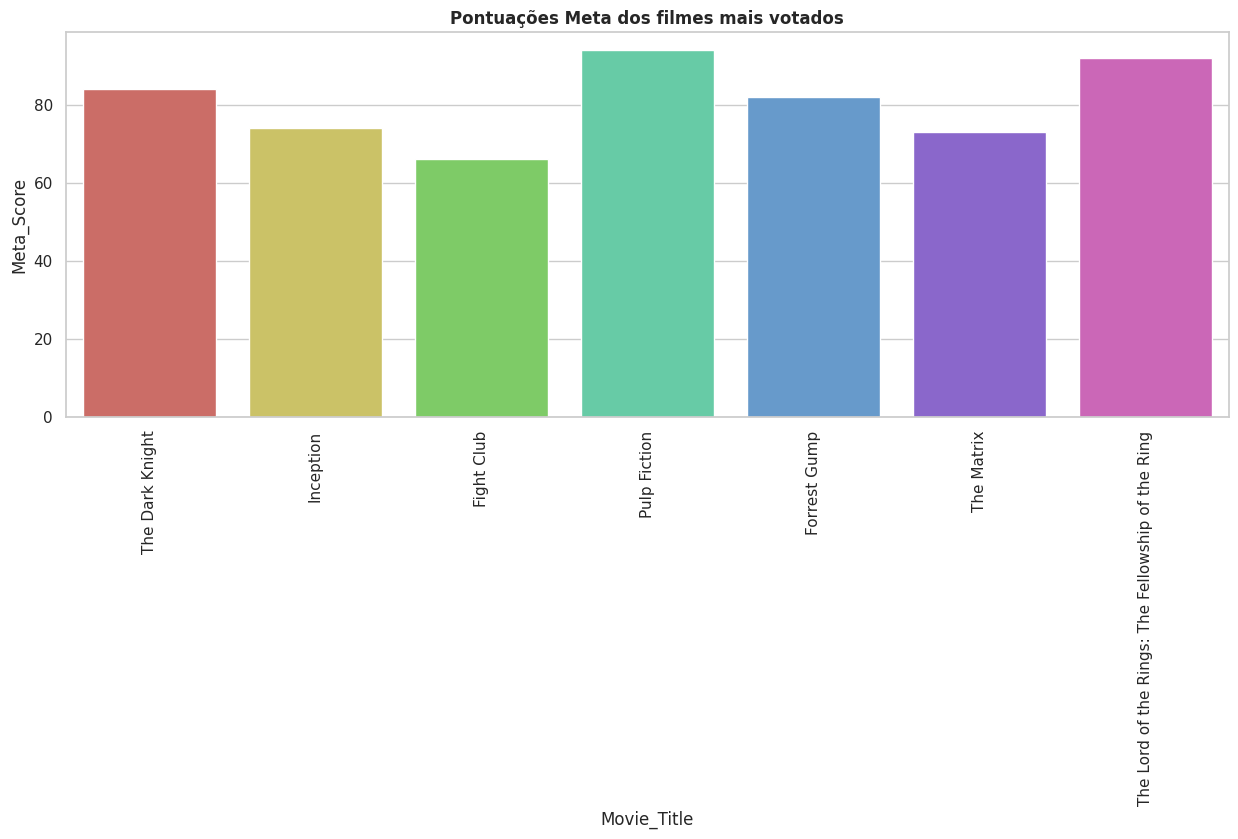

In [2163]:
# pontuações meta dos filmes mais votados

# obter os títulos dos sete primeiros filmes
movies_titles_top = top_voted['Movie_Title'][:7]

# plotar gráfico
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x = movies_titles_top, y = top_voted['Meta_Score'][:7], hue = movies_titles_top, palette = 'hls')
g.set_title("Pontuações Meta dos filmes mais votados", weight = "bold")
plt.xticks(rotation=90)
plt.show()

- Os três filmes mais votados tiveram as pontuações Meta 84 ('The Dark Knight'), 74 ('Inception') e 66 ('Fight Club').

### Hipóteses

#### Questão: Há uma diferença significativa nas médias de faturamento entre os gêneros de filmes?
- Teste: ANOVA


In [2164]:
# realizar o teste ANOVA
res_ANOVA = f_oneway(*[dados_filmes[dados_filmes['Genre'] == genero]['Gross'] for genero in dados_filmes['Genre'].unique()])

# exibir os resultados
print(f"Resultado ANOVA: F = {res_ANOVA.statistic}, p = {res_ANOVA.pvalue}")

# interpretar os resultados
if res_ANOVA.pvalue < 0.05:
    print("Há uma diferença significativa nas médias de faturamento entre os gêneros de filmes.")
else:
    print("Não há uma diferença significativa nas médias de faturamento entre os gêneros de filmes.")

Resultado ANOVA: F = 2.6608673736558357, p = 5.351913625209173e-22
Há uma diferença significativa nas médias de faturamento entre os gêneros de filmes.


#### Questão: Há uma diferença significativa nas médias de faturamento dos filmes com diferentes atores/atrizes 1?
- Teste: ANOVA


In [2165]:
# realizar o teste ANOVA
res_ANOVA = f_oneway(*[dados_filmes[dados_filmes['Star1'] == at]['Gross'] for at in dados_filmes['Star1'].unique()])

# exibir os resultados
print(f"Resultado ANOVA: F = {res_ANOVA.statistic}, p = {res_ANOVA.pvalue}")

# interpretar os resultados
if res_ANOVA.pvalue < 0.05:
    print("Há uma diferença significativa nas médias de faturamento entre filmes com diferentes atores/atrizes principais.")
else:
    print("Não há uma diferença significativa nas médias de faturamento entre filmes com diferentes atores/atrizes principais.")

Resultado ANOVA: F = 2.1233530494375334, p = 1.7196065323108892e-14
Há uma diferença significativa nas médias de faturamento entre filmes com diferentes atores/atrizes principais.


#### Questão: Há uma diferença significativa nas médias de faturamento entre filmes com diferentes classificações etárias?
- Teste: ANOVA


In [2166]:
# realizar o teste ANOVA
res_ANOVA = f_oneway(*[dados_filmes[dados_filmes['Certificate'] == cert]['Gross'] for cert in dados_filmes['Certificate'].unique()])

# exibir os resultados
print(f"Resultado ANOVA: F = {res_ANOVA.statistic}, p = {res_ANOVA.pvalue}")

# interpretar os resultados
if res_ANOVA.pvalue < 0.05:
    print("Há uma diferença significativa nas médias de faturamento entre filmes com diferentes classificações etárias.")
else:
    print("Não há uma diferença significativa nas médias de faturamento entre filmes com diferentes classificações etárias.")

Resultado ANOVA: F = 8.474145193551223, p = 1.6394294910360256e-18
Há uma diferença significativa nas médias de faturamento entre filmes com diferentes classificações etárias.


In [2167]:
# matriz de correlação dos dados numéricos

# colunas numéricas
num_cols = ['Released_Year', 'Runtime_Min', 'IMDB_Rating', 'Meta_Score', 'No_of_Votes', 'Gross']

# gerar matriz de correlação
corr = dados_filmes[num_cols].corr()

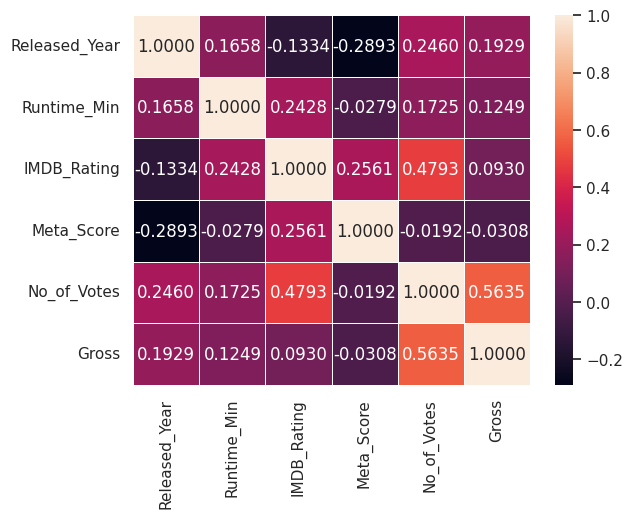

In [2168]:
plot = sns.heatmap(corr, annot = True, fmt=".4f", linewidths=.6)

- Há uma correlação moderada de 0,5635 entre o número de votos e o faturamento.
- Há uma correlação fraca de 0.4793 entre o número de votos e a nota IMDB.
- Não há nenhuma variável que esteja fortemente correlacionada uma com a outra.

#### Seleção de características

In [2169]:
# separar as características dos rótulos

# colunas das características numéricas
cols = ['Released_Year', 'Runtime_Min', 'Meta_Score', 'No_of_Votes', 'Gross']

# características
X = dados_filmes[cols]

# rótulos
y = dados_filmes['IMDB_Rating']

In [2170]:
# realizar seleção de características
seletor = SelectKBest(score_func=f_regression, k='all')
seletor.fit(X, y)
pontuacoes = seletor.scores_

# exibir as pontuações
for caracteristica, pontuacao in zip(X.columns, pontuacoes):
    print(f"{caracteristica}: {pontuacao}")

Released_Year: 18.051100602920194
Runtime_Min: 62.430284498333336
Meta_Score: 69.99313279466362
No_of_Votes: 297.3614062028539
Gross: 8.692271684968793


- Quanto maior a pontuação, maior influência a característica exerce sobre a nota IMDB.
- As três maiores pontuações pertencem às características: 'No_of_Votes', Meta_Score e Runtime_Min, respctivamente. Portanto, essas três características serão utilizadas.

In [2171]:
# separar as características dos rótulos

# colunas das características selecionadas
cols_ = ['No_of_Votes', 'Meta_Score', 'Runtime_Min']

# características
X_ = dados_filmes[cols_]

# rótulos
y_ = dados_filmes['IMDB_Rating']

In [2172]:
X_.head()

,No_of_Votes,Meta_Score,Runtime_Min
0,1620367,100.0,175
1,2303232,84.0,152
2,1129952,90.0,202
3,689845,96.0,96
4,1642758,94.0,201


In [2173]:
y_.head()

0    9.2
1    9.0
2    9.0
3    9.0
4    8.9
Name: IMDB_Rating, dtype: float64

### Previsão da avaliação / nota do IMDB

- Regressor Linear

In [2174]:
# separar os dados em subconjuntos para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.25, random_state = 10)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (749, 3)
y_train shape: (749,)
X_test shape: (250, 3)
y_test shape: (250,)


In [2175]:
# criar instância do regressor linear
linear_reg = LinearRegression()

# fazer o fit dos dados
linear_reg.fit(X_train, y_train)

# calcular as predições
preds = linear_reg.predict(X_test)

Text(0, 0.5, 'Valores preditos')

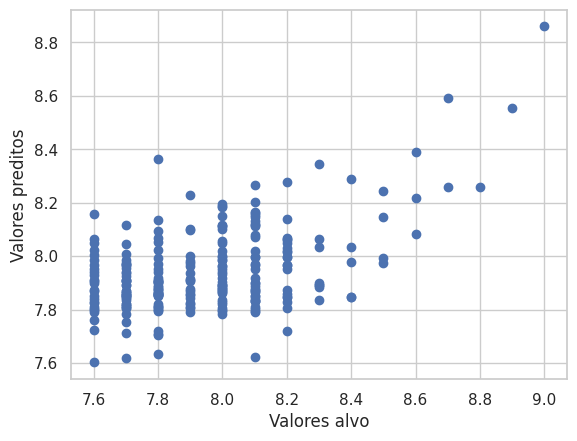

In [2176]:
# exibir gráfico com os valores alvo versus valores preditos
plt.scatter(y_test, preds)
plt.xlabel("Valores alvo")
plt.ylabel("Valores preditos")

- Quanto mais próximos os erros estiverem de zero, melhor é o desempenho do modelo.

In [2177]:
def avaliar_modelo(y_test, preds, nome_modelo):
  """
  Calcula os erros e acurácias para avaliar o
  desempenho do modelo.
  """

  # calcular os erros MAE, MSE e RMSE
  mae = mean_absolute_error(y_test, preds)
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)

  # calcular o MAPE
  # calcular os erros
  errors = abs(preds - y_test)

  # calcular o Mean Absolute Percentage Error (MAPE)
  mape = 100 * (errors / y_test)

  # calcular a acurácia e arredondar o valor
  acc = 100 - np.mean(mape)
  acc = round(acc, 4)

  print(f"Modelo: {nome_modelo}")
  print(f'Mean Absolute Error (MAE): {mae}')
  print(f'Mean Squared Error (MSE): {mse}')
  print(f'Root Mean Squared Error (RMSE): {rmse}')
  print(f"Acurácia: {acc} %")

  return acc

In [2178]:
# calcular as métricas do modelo 'Linear Regression'
linear_reg_acc = avaliar_modelo(y_test, preds, "Regressor Linear")

Modelo: Regressor Linear
Mean Absolute Error (MAE): 0.18329239681882148
Mean Squared Error (MSE): 0.05095888065399551
Root Mean Squared Error (RMSE): 0.22574073769259173
Acurácia: 97.703 %


- Regressor kNN

In [2179]:
# criar instância do regressor kNN
knn_reg = KNeighborsRegressor(n_neighbors=5)

# fazer o fit dos dados
knn_reg.fit(X_train, y_train)

# calcular as predições
preds = knn_reg.predict(X_test)

In [2180]:
# calcular as métricas do modelo 'KNeighbors Regressor'
knn_reg_acc = avaliar_modelo(y_test, preds, "Regressor kNN")

Modelo: Regressor kNN
Mean Absolute Error (MAE): 0.20367999999999997
Mean Squared Error (MSE): 0.061718399999999965
Root Mean Squared Error (RMSE): 0.24843188201195104
Acurácia: 97.4479 %


- Regressor *Random Forest*

In [2181]:
# criar instância do regressor Random Forest
random_forest_reg = RandomForestRegressor()

# fazer o fit dos dados
random_forest_reg.fit(X_train, y_train)

# calcular as predições
preds = random_forest_reg.predict(X_test)

In [2182]:
# calcular as métricas do modelo 'Random Forest Regressor'
random_forest_acc = avaliar_modelo(y_test, preds, "Regressor Random Forest")

Modelo: Regressor Random Forest
Mean Absolute Error (MAE): 0.17411599999999983
Mean Squared Error (MSE): 0.04580320399999985
Root Mean Squared Error (RMSE): 0.21401683111381647
Acurácia: 97.8152 %


- Regressor de Árvores de Decisão

In [2183]:
# criar instância do regressor Decision Tree
arvore_dec_reg = DecisionTreeRegressor()

# fazer o fit dos dados
arvore_dec_reg.fit(X_train, y_train)

# calcular as predições
preds = arvore_dec_reg.predict(X_test)

In [2184]:
# calcular as métricas do modelo 'Decision Tree Regressor'
arvore_dec_reg_acc = avaliar_modelo(y_test, preds, "Regressor de Árvores de Decisão")

Modelo: Regressor de Árvores de Decisão
Mean Absolute Error (MAE): 0.23079999999999995
Mean Squared Error (MSE): 0.08731999999999998
Root Mean Squared Error (RMSE): 0.29549957698785284
Acurácia: 97.0986 %


- Comparação das acurácias dos modelos

In [2185]:
# criar um DataFrame com todas as acurácias dos modelos
modelos = pd.DataFrame({
    "Modelos": ["Regressor Linear", "Regressor kNN", "Regressor 'Random Forest'"," Regressor de Árvores de Decisão"],
    "Acurácias (%)": [linear_reg_acc, knn_reg_acc, random_forest_acc, arvore_dec_reg_acc]
     }
)

# ordenar de forma decrescente
modelos.sort_values(by = "Acurácias (%)", ascending = False)

,Modelos,Acurácias (%)
2,Regressor 'Random Forest',97.8152
0,Regressor Linear,97.7030
1,Regressor kNN,97.4479
3,Regressor de Árvores de Decisão,97.0986


- O regressor *Random Forest* obteve o melhor desempenho.

- Salvando o modelo do regressor *Random Forest*

In [2186]:
nome_arquivo = "modelo_random_forest.pkl"

# salvar modelo
pickle.dump(random_forest_reg, open(nome_arquivo, "wb"))

- Testando o modelo do regressor *Random Forest* com novos dados

In [2187]:
# nova entrada
nova_entrada = [{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}]

# converter para DataFrame
nova_entrada = pd.DataFrame.from_dict(nova_entrada)

In [2188]:
nova_entrada.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


In [2189]:
def preprocessar_dados(df):
  """
  Pré-processa os dados e os ajusta para fornecer
  como entrada para o modelo.
  """

  # alterar os cabeçalhos
  df.rename(columns = {"Runtime": "Runtime_Min", "Meta_score": "Meta_Score"}, inplace = True)

  # remover a substring 'min' da coluna 'Runtime'
  df['Runtime_Min'] = df['Runtime_Min'].str.replace('min', '')

  # converter de string para inteiro
  df['Runtime_Min'] = df['Runtime_Min'].astype(int)

  # selecionar as colunas relevantes
  cols = ['No_of_Votes', 'Meta_Score', 'Runtime_Min']

  return df[cols]

In [2190]:
# pré-processar os dados
nova_entrada_ = preprocessar_dados(nova_entrada)

In [2191]:
nova_entrada_.head()

,No_of_Votes,Meta_Score,Runtime_Min
0,2343110,80.0,142


In [2192]:
# carregar modelo
nome_arquivo_ = "/content/modelo/modelo_random_forest.pkl"
modelo_RF = pickle.load(open(nome_arquivo_, "rb"))

# calcular as predições
pred = modelo_RF.predict(nova_entrada_)

print(f"Predição da nota IMDB: {pred[0]:.4f}")

Predição da nota IMDB: 8.7680


### Respondendo as perguntas especificadas no tópico "Entregas"

Qual filme você recomendaria para uma pessoa que você não conhece?

- Eu recomendaria o filme 'The Dark Knight' pois, além de ter sido o filme mais votado (2.303.232 votos), esse filme obteve avaliação IMDB de 9 e pontuação Meta de 84.

Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
- O número de votos tem uma correlação moderada de 0.5635 com o faturamento. E realizando testes de hipóteses ANOVA verifiquei que o gênero do filme, o ator/atriz principal e a faixa etária também influenciam no faturamento.

Quais insights podem ser tirados com a coluna *Overview*? É possível inferir o gênero do filme a partir dessa coluna?
- As palavras que mais aparecem na coluna *Overview* são *life*, *find*, *two*, *man* e *young*.
- É possível inferir o gênero do filme utilizando técnicas de processamento de linguagem natural (NLP) juntamente com aprendizado de máquina. Uma abordagem seria utilizar a técnica *Term frequency Inverse document frequency* (TFIDF), para converter textos em vetores com base na quantidade de vezes que as palavras aparecem, juntamente com o algoritmo *Naive Bayes*.

Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

- Para fazer a previsão da nota IMDB, primeiramente um pré-processamento foi realizado para garantir que os dados estivessem adequados para serem utilizados.

- Em seguida, verifiquei a correlação existente entre as variáveis numéricas e também apliquei uma técnica de seleção de características para identificar as colunas mais relevantes. Com base nessas duas abordagens as características 'No_of_Votes', 'Meta_Score' e	'Runtime_Min' foram escolhidas.

- O tipo de problema que estamos resolvendo é de regressão, pois as notas IMDB são valores contínuos e estão dentro de um intervalo grande de opções.

- O modelo que apresentou o melhor desempenho foi o *Random Forest* com uma acurácia de 97.8152 %. O regressor *Random Forest* constrói várias árvores de decisões utilizando subconjuntos de dados aleatórios e, como resultado de cada árvore, a previsão da variável alvo é feita, que no nosso caso é a nota IMDB. A média de todas essas previsões é a previsão final. Essa abordagem ajuda a reduzir o *overfitting*, não é muito afetada por ruídos e *outliers* e também ajuda a identificar quais são as características mais relevantes. Como desvantagens dessa abordagem, tem o fato de que utilizar muitas árvores pode requerer mais tempo e memória computacional e também pode dificultar a interpretação dos resultados.

- Com relação às métricas, além da acurácia, os erros Mean Absolute Error (MAE), Mean Squared Error (MSE) e Root Mean Squared Error (RMSE) foram calculados para medir o desempenho do modelo. Os três erros juntos ajudam a avaliar o desempenho do modelo de forma mais abrangente. O MAE penaliza os erros de forma linear, ou seja, não diferencia erros grandes de erros pequenos, e é menos afetado por *outliers*. O MSE e RMSE são mais sensíveis a *outliers* e penalizam mais erros maiores, com a diferença de que o RMSE está na mesma unidade que a variável alvo. E a acurácia, nos ajuda a verificar a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões.


Supondo um filme com as características especificadas no documento, qual seria a nota IMDB?
- Utilizando o regressor *Random Forest*, que obteve o melhor desempenho durante os testes realizados, a nota IMDB seria 8.7680